In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Data Visualization

In [2]:
df = pd.read_csv('Next 6 Months - Data.csv')

# Get rid of data after our desired date of September 22nd
df = df[:1489]
print(df)
print(df['Date'][21])

                     Date     Open     High      Low    Close      Volume  \
0     10/21/2016 16:00:00  2139.43  2142.63  2130.09  2141.16   654860857   
1     10/24/2016 16:00:00  2148.50  2154.79  2146.91  2151.33   523564705   
2     10/25/2016 16:00:00  2149.72  2151.44  2141.93  2143.16   530792143   
3     10/26/2016 16:00:00  2136.97  2145.73  2131.59  2139.43   562087522   
4     10/27/2016 16:00:00  2144.06  2147.13  2132.52  2133.04   614708800   
...                   ...      ...      ...      ...      ...         ...   
1326   1/28/2022 16:00:00  4336.19  4432.72  4292.46  4431.85  2913164357   
1327   1/31/2022 16:00:00  4431.79  4516.89  4414.02  4515.55  2963155477   
1328    2/1/2022 16:00:00  4519.57  4550.49  4483.53  4546.54  2712733572   
1329    2/2/2022 16:00:00  4566.39  4595.31  4544.32  4589.38  2903950893   
1330    2/3/2022 16:00:00  4535.41  4542.88  4470.39  4477.44  2686460186   

      Previous Day Close  Previous Week Close  Previous Day Interest (EFFR)

In [3]:
# Print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1331 non-null   object 
 1   Open                          1331 non-null   float64
 2   High                          1331 non-null   float64
 3   Low                           1331 non-null   float64
 4   Close                         1331 non-null   float64
 5   Volume                        1331 non-null   int64  
 6   Previous Day Close            1331 non-null   float64
 7   Previous Week Close           1331 non-null   float64
 8   Previous Day Interest (EFFR)  1331 non-null   float64
 9   Previous Mo. Inflation (CPI)  1331 non-null   float64
 10  Label: Next 6 Months Opening  1331 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 114.5+ KB


## Data Distribution

count    1331.000000
mean     3351.317551
std       693.374489
min      2237.400000
25%      2771.900000
50%      3096.630000
75%      3962.170000
max      4796.560000
Name: Label: Next 6 Months Opening, dtype: float64


C:\Users\nahom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


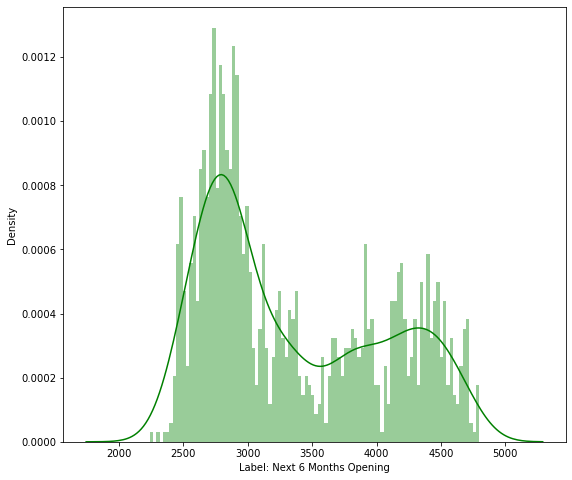

In [4]:
print(df['Label: Next 6 Months Opening'].describe())
plt.figure(figsize=(9, 8))

sns.distplot(df['Label: Next 6 Months Opening'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [5]:
# Select the numerical featrues
df_num = df.select_dtypes(include = 'number')
df_num.head()

,Open,High,Low,Close,Volume,Previous Day Close,Previous Week Close,Previous Day Interest (EFFR),Previous Mo. Inflation (CPI),Label: Next 6 Months Opening
0,2139.43,2142.63,2130.09,2141.16,654860857,2141.34,2132.98,0.41,2.2,2443.25
1,2148.50,2154.79,2146.91,2151.33,523564705,2141.16,2126.50,0.41,2.2,2447.83
2,2149.72,2151.44,2141.93,2143.16,530792143,2151.33,2139.60,0.41,2.2,2459.27
3,2136.97,2145.73,2131.59,2139.43,562087522,2143.16,2144.29,0.41,2.2,2459.14
4,2144.06,2147.13,2132.52,2133.04,614708800,2139.43,2141.34,0.41,2.2,2460.61


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Previous Day Close'}>],
       [<AxesSubplot:title={'center':'Previous Week Close'}>,
        <AxesSubplot:title={'center':'Previous Day Interest (EFFR)'}>,
        <AxesSubplot:title={'center':'Previous Mo. Inflation (CPI)'}>],
       [<AxesSubplot:title={'center':'Label: Next 6 Months Opening'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

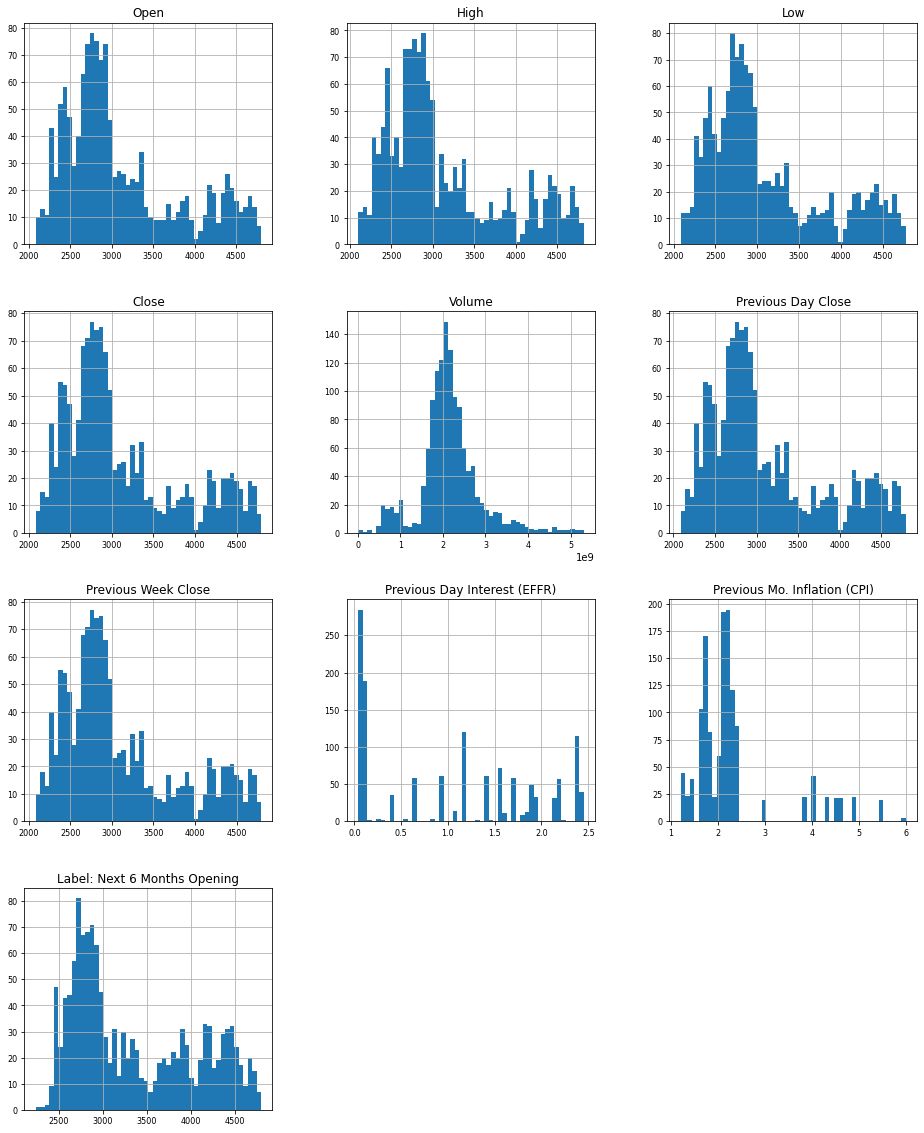

In [6]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Data Correlation

In [7]:
df_corr = df.corr()['Label: Next 6 Months Opening'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Next Month Opening:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with Next Month Opening:
High                            0.820791
Close                           0.818290
Open                            0.817769
Previous Day Close              0.817214
Low                             0.814984
Previous Week Close             0.813612
Previous Day Interest (EFFR)   -0.665665
Name: Label: Next 6 Months Opening, dtype: float64


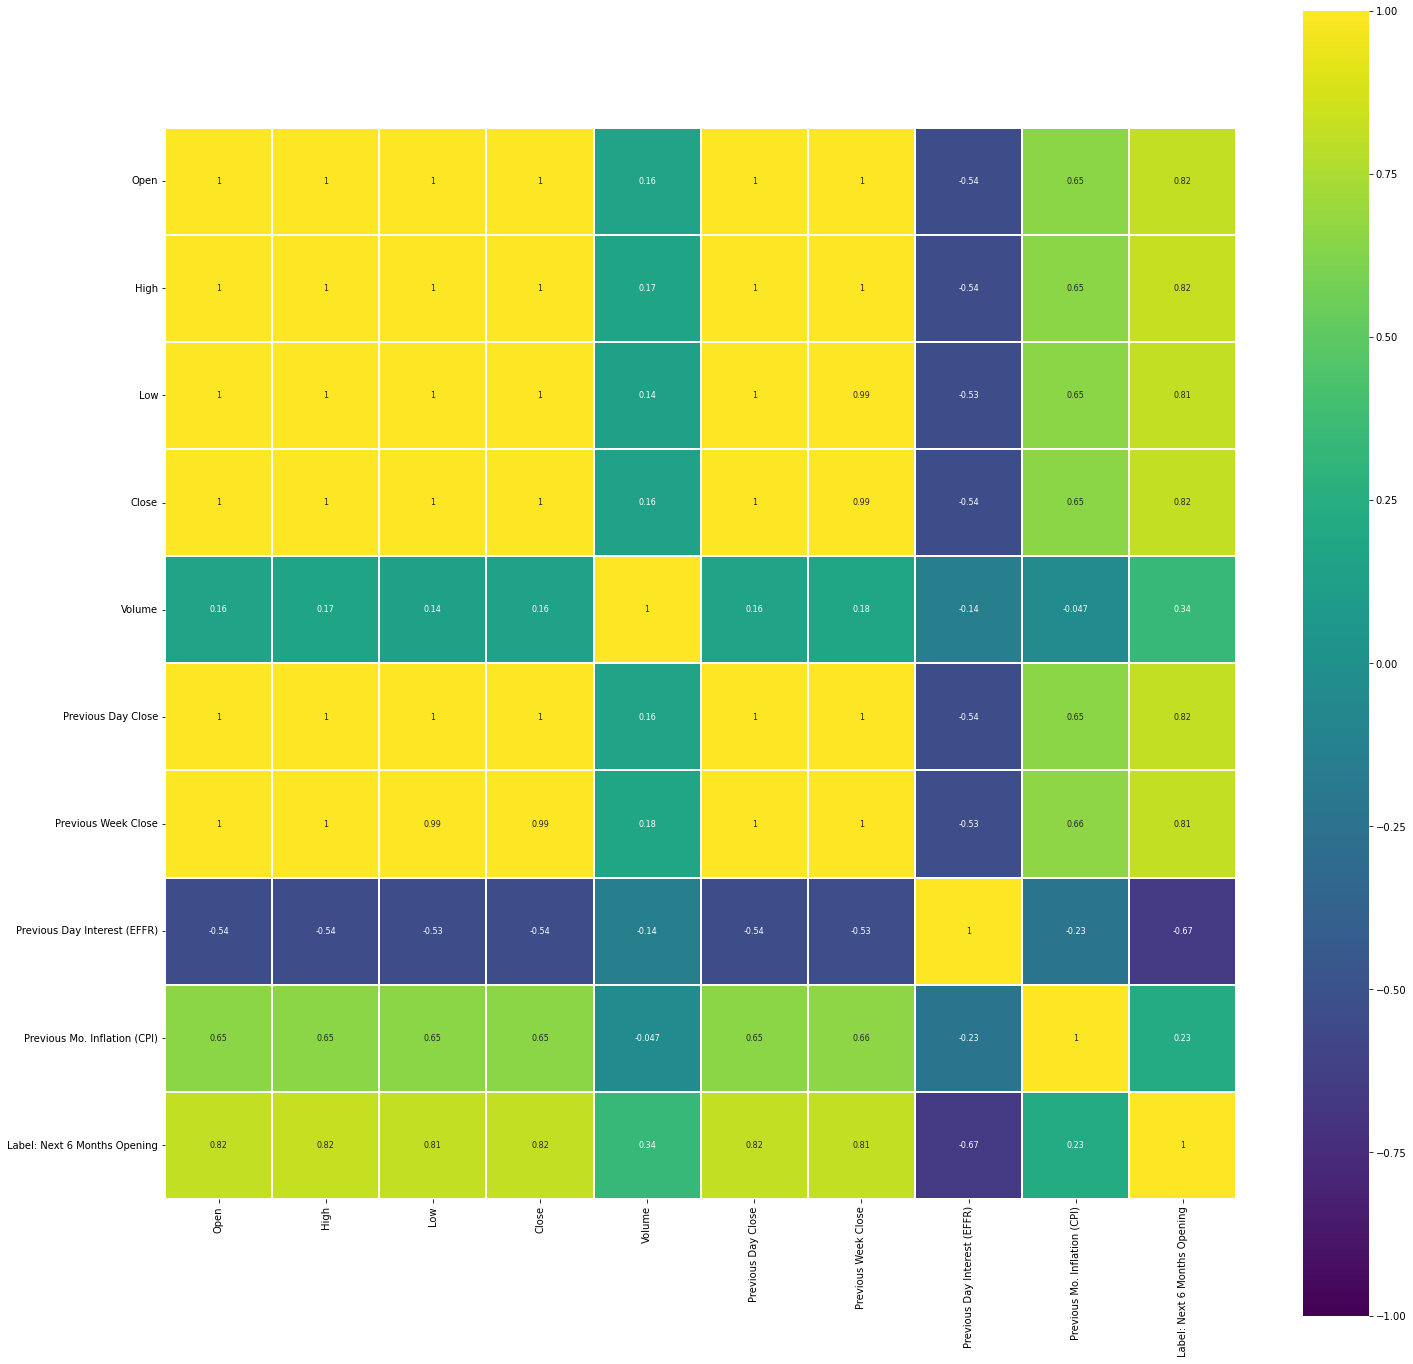

In [8]:
df_corr = df.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

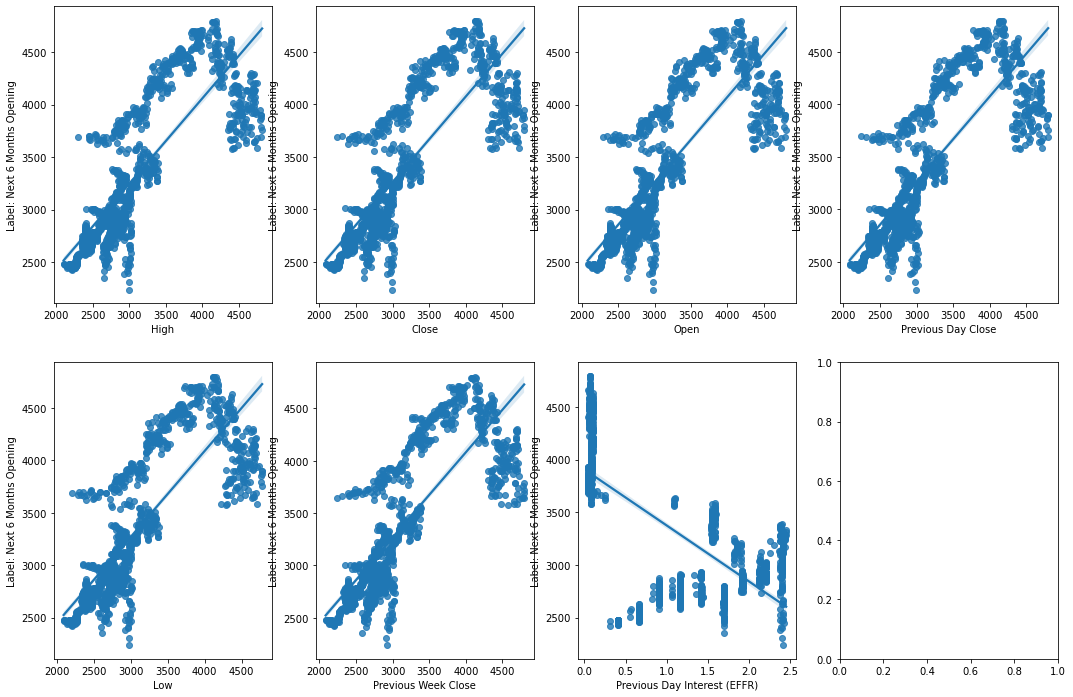

In [9]:
fig, ax = plt.subplots(round(len(golden_features_list) / 4), 4, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list) :
        sns.regplot(x=golden_features_list.index[i],y='Label: Next 6 Months Opening', data=df, ax=ax)

# Data Pre-Processing

## Data Cleaning

No Data Cleaning Required as there is no missing data.

## Features Engineering

Adding feature to capture volatility of the day

In [10]:
df['Day Range'] = df['High'] - df['Low']

Converting Dates to Month and Day Columns

In [11]:
dates = df["Date"].str.split('/').to_numpy()
months = [int(i[0]) for i in dates]
day = [int(i[0]) for i in dates]
df["Months"] = pd.DataFrame(months)
df["Day"] = pd.DataFrame(day)
df = df.drop(columns = ["Date"])
print(df)

         Open     High      Low    Close      Volume  Previous Day Close  \
0     2139.43  2142.63  2130.09  2141.16   654860857             2141.34   
1     2148.50  2154.79  2146.91  2151.33   523564705             2141.16   
2     2149.72  2151.44  2141.93  2143.16   530792143             2151.33   
3     2136.97  2145.73  2131.59  2139.43   562087522             2143.16   
4     2144.06  2147.13  2132.52  2133.04   614708800             2139.43   
...       ...      ...      ...      ...         ...                 ...   
1326  4336.19  4432.72  4292.46  4431.85  2913164357             4326.51   
1327  4431.79  4516.89  4414.02  4515.55  2963155477             4431.85   
1328  4519.57  4550.49  4483.53  4546.54  2712733572             4515.55   
1329  4566.39  4595.31  4544.32  4589.38  2903950893             4546.54   
1330  4535.41  4542.88  4470.39  4477.44  2686460186             4589.38   

      Previous Week Close  Previous Day Interest (EFFR)  \
0                 2132.98   

In [12]:
from scipy.stats import skew

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Day Range,2.302706
Previous Mo. Inflation (CPI),1.869685
Previous Week Close,0.908961
Low,0.904875
Previous Day Close,0.902738
Open,0.901319
Close,0.900949
High,0.897181
Volume,0.774458
Label: Next 6 Months Opening,0.515125


In [13]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 13 skewed numerical features to Box Cox transform


In [14]:
from scipy.stats import skew

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
Previous Mo. Inflation (CPI),1.397472
Low,0.656055
Previous Week Close,0.652330
Previous Day Close,0.651571
Close,0.651159
Open,0.650750
High,0.645627
Day Range,0.528911
Label: Next 6 Months Opening,0.365719
Previous Day Interest (EFFR),-0.053682


## Feature Selection

Split into testing and training data

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Label: Next 6 Months Opening"])
y = df["Label: Next 6 Months Opening"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X, y)

           Open       High        Low      Close      Volume  \
0     14.394571  14.399291  14.380760  14.397124  133.398808   
1     14.407934  14.417173  14.405595  14.412094  128.775626   
2     14.409728  14.412255  14.398259  14.400073  129.054447   
3     14.390939  14.403858  14.382982  14.394571  130.225732   
4     14.401399  14.405919  14.384358  14.385128  132.075718   
...         ...        ...        ...        ...         ...   
1326  16.748109  16.825549  16.712545  16.824858  168.545189   
1327  16.824810  16.891912  16.810660  16.890864  168.992940   
1328  16.894008  16.918111  16.865737  16.915039  166.681723   
1329  16.930451  16.952803  16.913312  16.948229  168.461956   
1330  16.906373  16.912191  16.855381  16.860940  166.428843   

      Previous Day Close  Previous Week Close  Previous Day Interest (EFFR)  \
0              14.397389            14.385039                      0.352598   
1              14.397124            14.375438                      0.3525

### Forward feature selection

In [21]:
# Import sequenctial features selector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

sfs = SFS(LinearRegression(), 
           k_features=12,
           forward=True, 
           floating=False,
           verbose=0,
           scoring='neg_mean_absolute_error',
           cv=3)

sfs = sfs.fit(X_train, y_train)

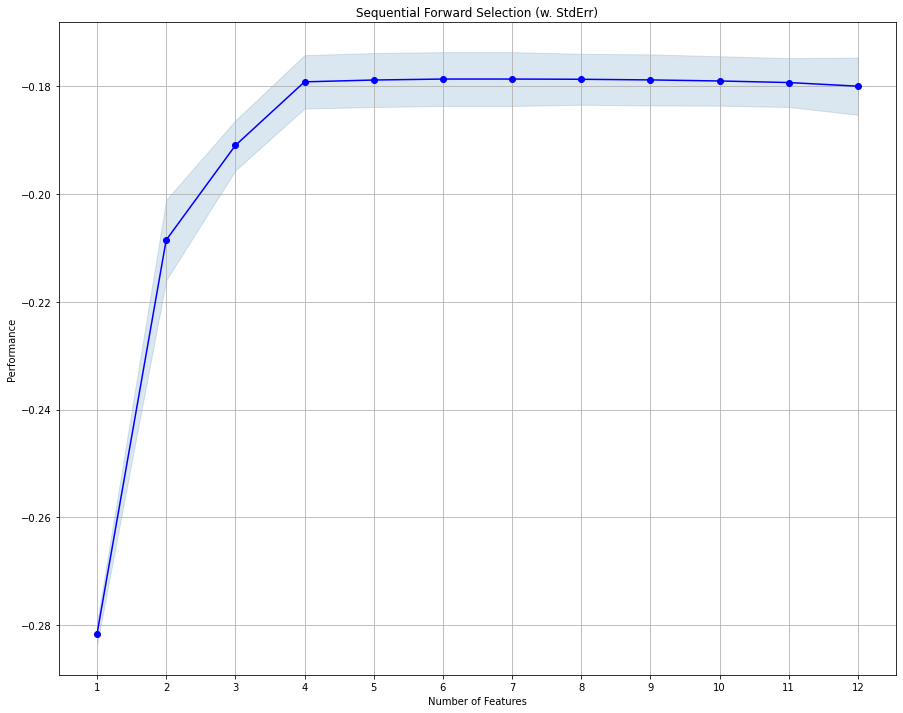

In [23]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15, 12))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### Analysis

To maximize performance, we should use 7 features. We will drop Volume and EFFR as they had a very small correlation with our label. We will be using "High" as it is highly correlated with the label as well as "Previous Week Close," "Previous Day Close," "Close," "Low," and "Open". We will also use "Close," "Previous Day Close," and "Previous Month Close" as they are highly correlated with the label and make sense. We will also use "CPI" for variety and because it is correlated with the label. Finally we will use our engineered features "Day Range" to capture reaction to market volatility and "Month" to track seasonal changes in the market. In summary, the 6 features we are using are:
1. High
2. Close
3. Previous Day Close
4. Previous Month Close
5. CPI
6. Day Range
7. Month 

### Decision Tree

In [24]:
display(df)

,Open,High,Low,Close,Volume,Previous Day Close,Previous Week Close,Previous Day Interest (EFFR),Previous Mo. Inflation (CPI),Label: Next 6 Months Opening,Day Range,Months,Day
0,14.394571,14.399291,14.380760,14.397124,133.398808,14.397389,14.385039,0.352598,1.270788,14.818097,3.188218,2.885846,2.885846
1,14.407934,14.417173,14.405595,14.412094,128.775626,14.397124,14.375438,0.352598,1.270788,14.824131,2.583950,2.885846,2.885846
2,14.409728,14.412255,14.398259,14.400073,129.054447,14.412094,14.394822,0.352598,1.270788,14.839161,2.820776,2.885846,2.885846
3,14.390939,14.403858,14.382982,14.394571,130.225732,14.400073,14.401738,0.352598,1.270788,14.838990,3.354715,2.885846,2.885846
4,14.401399,14.405919,14.384358,14.385128,132.075718,14.394571,14.397389,0.352598,1.270788,14.840917,3.400776,2.885846,2.885846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,16.748109,16.825549,16.712545,16.824858,168.545189,16.740263,16.797814,0.077407,2.160996,16.177079,7.342478,0.730463,0.730463
1327,16.824810,16.891912,16.810660,16.890864,168.992940,16.824858,16.807556,0.077407,2.160996,16.216037,6.711058,0.730463,0.730463
1328,16.894008,16.918111,16.865737,16.915039,166.681723,16.890864,16.764483,0.077407,2.259674,16.193077,5.886311,1.194318,1.194318
1329,16.930451,16.952803,16.913312,16.948229,168.461956,16.915039,16.759221,0.077407,2.259674,16.165728,5.391928,1.194318,1.194318


In [43]:
X = df.iloc[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11 ,12]]
y = df.iloc[:, [9]]
y = y.astype('float')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
display(y_train)

,Label: Next 6 Months Opening
0,14.818097
1,14.824131
2,14.839161
3,14.838990
4,14.840917
...,...
1296,16.400221
1297,16.386031
1298,16.448948
1299,16.471800


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
forest = RandomForestClassifier(n_estimators=8)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
display(y_train)
score = r2_score(y_pred,y_test)
print(score)

C:\Users\nahom\AppData\Local\Temp\ipykernel_19924\1192261279.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'